# Introduction to Scikit-learn (sklearn)

This notebook demonstrates some of the most useful function of the scikit-learn

What we are going to cover

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the the right estimator/algorithm for our poblems
3. Fit the model/algorithm and use it to make prediction on pur data
4. Evaluating a model
5. Improve model
6. Save and load a trained model
7. Putting all together

## 0. An end-to-end Scikit-Learn workflow

In [8]:
# 1 Get the data ready
import pandas as pd
import numpy as np

heartDisease = pd.read_csv("../Matplotib/heart-disease.csv")
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Create X (features matrix)
X = heartDisease.drop('target', axis=1)

# Create Y (labels)
Y = heartDisease["target"]

In [10]:
# 2. Choose the the right model and hyperparametors
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the defoult hyperparametors
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [17]:
y_preds = clf.predict(X_test)
y_preds

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
Y_test

122    1
260    0
32     1
181    0
220    0
      ..
86     1
300    0
150    1
105    1
88     1
Name: target, Length: 61, dtype: int64

In [19]:
clf.fit(X_train, Y_train);

In [20]:
# 4. Evalute the model on the training data and test data
clf.score(X_train, Y_train)

1.0

In [21]:
clf.score(X_test, Y_test)

0.7704918032786885

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

NameError: name 'y_preds' is not defined

In [23]:
confusion_matrix(Y_test, y_preds)

NameError: name 'y_preds' is not defined

In [24]:
accuracy_score(Y_test, y_preds)

NameError: name 'y_preds' is not defined

In [25]:
# 5. Impove a model
# Try diffrent amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 77.05%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 73.77%

Trying model with 80 estimators...
Model accuracy on test set: 77.05%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



In [26]:
#6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [27]:
loadedModel = pickle.load(open("random_forest_model_1.pkl", "rb"))
loadedModel.score(X_test, Y_test)

0.7868852459016393

In [28]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 18:29:29)  [Clang 12.0.0 ]
executable: /Users/musa/opt/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 22.2.2
   setuptools: 63.4.1
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.9.1
       Cython: 0.29.32
       pandas: 1.4.4
   matplotlib: 3.5.2
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


/Users/musa/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## 1. Getting our data ready to be used with machine learning
 ### Three main things we have to do:
   * 1. Split the data into features and lables (usually `X` and `Y`)
   * 2. Filling (also called imputing) or disregarding missing values
   * 3. Converting non-numerical values to numerical values (also called feature encoding)

In [29]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
X.shape[0] * 0.8

242.4

## 1.1 Make sure it's all numerical

In [32]:
carSales = pd.read_csv("car-sales-extended.csv")
carSales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
len(carSales)

1000

In [34]:
carSales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# Split data to X and Y
xx = carSales.drop("Price", axis=1)
yy = carSales["Price"]

# Split into training and test
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2)

In [36]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(xx_train, yy_train)
model.score(xx_test, yy_test)

ValueError: could not convert string to float: 'Honda'

In [37]:
xx.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [38]:
# Turn categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFutures = ["Make","Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("OneHot", 
                                  oneHot, 
                                  categoricalFutures)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(xx)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [39]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [40]:
dummies = pd.get_dummies(carSales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [41]:
# Lets refit the model 
np.random.seed(42)
xx_train, xx_test,yy_train, yy_test = train_test_split(transformed_X, yy,test_size=0.2)

model.fit(xx_train, yy_train)

RandomForestRegressor()

In [42]:
model.score(xx_test, yy_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with value (also known as imputation).
2. Remove the samples with misssing data altogether.


In [43]:
# Import car sales missing data
carSalesMissingData = pd.read_csv("car-sales-extended-missing-data.csv")
carSalesMissingData.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# Create X and Y labels
xxx = carSalesMissingData.drop("Price", axis=1)
yyy = carSalesMissingData["Price"]

In [45]:
# Lets try and convert our data to numbers
# Turn categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFuturesMissing = ["Make","Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("OneHot", 
                                  oneHot, 
                                  categoricalFuturesMissing)],
                               remainder="passthrough")
transformed_XX = transformer.fit_transform(xxx)
transformed_XX

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill data with Pandas

In [46]:
# Fill the "Make" column
carSalesMissingData["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
carSalesMissingData["Colour"].fillna("missing", inplace=True)

# Fill the "Odometor" column
carSalesMissingData["Odometer (KM)"].fillna(carSalesMissingData["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
carSalesMissingData["Doors"].fillna(4, inplace=True)

In [47]:
# Check our dataFrame again
carSalesMissingData.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove rows with missing Price value
carSalesMissingData.dropna(inplace=True)

In [49]:
carSalesMissingData.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(carSalesMissingData)

950

In [51]:
# Lets try and convert our data to numbers
# Turn categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFuturesMissing = ["Make","Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("OneHot", 
                                  oneHot, 
                                  categoricalFuturesMissing)],
                               remainder="passthrough")
transformed_XX = transformer.fit_transform(carSalesMissingData)
transformed_XX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [52]:
pd.DataFrame(transformed_XX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


## Oprtion 2: Fill missing values with scikit-Learn

In [53]:
carMisingData = pd.read_csv("car-sales-extended-missing-data.csv")
carMisingData.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
carMisingData.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# Drop the row with no labels
carMisingData.dropna(subset=["Price"], inplace=True)
carMisingData.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
# Split into X and Y
mx =carMisingData.drop("Price", axis=1)
y = carMisingData["Price"]


In [57]:
mx.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [58]:
# Fill missing values with sckit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
car_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# Define colums
car_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (somthing that fills missing data)
imputer = ColumnTransformer([
    ("car_imputer", car_imputer, car_feature),
    ("door_imputer", door_imputer, door_feature),
    ("numerical_imputer", numerical_imputer, num_feature)
])

# Transform the data
filled_x = imputer.fit_transform(mx)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [59]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Coloumn", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Coloumn,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [60]:
car_sales_filled.isna().sum()

Make             0
Coloumn          0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
# Lets try and convert our data to numbers
# Turn categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFuturesMissing = ["Make","Coloumn","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("OneHot", 
                                  oneHot, 
                                  categoricalFuturesMissing)],
                               remainder="passthrough")
transformed_mx = transformer.fit_transform(car_sales_filled)
transformed_mx

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [62]:
# Now we have got our data as numbers and filled (no missing)
# Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

mx_train, mx_test, my_train, my_test = train_test_split(transformed_mx,
                                                       y,
                                                       test_size=0.2)
model_x = RandomForestRegressor()
model_x.fit(mx_train, my_train)
model_x.score(mx_test, my_test)

0.21990196728583944

#### Note: The 50 less value in transformed data is becouse we dropped the rows (50 tottal) with missing values in model_mx

## 2. Choosing the right estimator/algorithm for your problem

# Somthing things to note:
* Sklearn refers to machine learning models, algorithms as estimator.
* Classification problem - predicting a category (heart diseasy or not).
    * Sometimes you will see `clf` (short for classifier) used as calssification estimator.
* Regression problem - predicting a number (selling price of a car).

if you are working on machine learning problem and looking to use Sklearn and not sure what model you should use, referto the sklearn machine learning: map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

 ### 2.1 Picking a machine learning model for a regression problem
    Let's use the California Housing dataset

In [63]:
# Get California Housing dataset 
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [64]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [67]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
# Import algorithm
from sklearn.linear_model import Lasso
# Setup random seed

# Create the data
x1 = housing_df.drop("target", axis=1)
y1 = housing_df["target"] #median house price in $100,000s

# Split into train and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20)

# Instantiate and fit the model (on training set)
model1 = Lasso()
model.fit(x1_train, y1_train)

# Check the score of the model (on the test set)
model.score(x1_test, y1_test)

0.8102785325575549

In [69]:
# Import algorithm
from sklearn.linear_model import Ridge
# Setup random seed

# Create the data
x1 = housing_df.drop("target", axis=1)
y1 = housing_df["target"] #median house price in $100,000s

# Split into train and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20)

# Instantiate and fit the model (on training set)
model1 = Ridge()
model.fit(x1_train, y1_train)

# Check the score of the model (on the test set)
model.score(x1_test, y1_test)

0.8060483211387895

What if `Ridge` didn't work or the score didn't fit our needs?
Well, we could always try a diffrent model...
How about we try an ensemble model (an ensable is combination of smaller models to try and make better prediction than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [70]:
# Import the random RandomForestRegressor model calss from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x2 = housing_df.drop("target", axis=1)
y2 = housing_df["target"]

# Split into train and test sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20)

# Create random forest model
model2 = RandomForestRegressor()
model2.fit(x2_train, y2_train)

# Check the score of the model (on the test set)
model.score(x2_test, y2_test)

0.9366452338613162

In [71]:
y2_pred = model2.predict(x2_test)
y2_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [72]:
np.array(y2_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

## 2.2 Chossing an estimator for calssification problem
Let's go to the map: 

Consulting the map and it says to try `LinearSVC`

In [73]:
# Import the LinearSVC estimator calss
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x3 = heartDisease.drop("target", axis=1)
y3 = heartDisease["target"]

# Split into train and test sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.20)

# Create random forest model
clf3 = LinearSVC(max_iter=10000)
clf3.fit(x3_train, y3_train)

# Evalute the LinearCVS
clf3.score(x3_test, y3_test)

/Users/musa/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

##### Tidbit:
     1. If you have structured data, used ensamble methods
     2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data

Difrent names for:
* X = features, features variables, data
* Y = lables, targets, target variable

In [74]:
x3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [75]:
y3.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning model
2 ways to make predictions:
  1. `predict()`
  2. `predict_proba()`

In [76]:
# Use a trained model to make predictions
clf3.predict(x3_test[:5])

array([0, 1, 1, 0, 1])

In [77]:
np.array(y3_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [78]:
# Compare predictios to truth labels to evaluate the model
y3_preds = clf3.predict(x3_test)
np.mean(y3_preds == y3_test)

0.8688524590163934

In [85]:
# Make predictions with predict_proba()
clf3.predict_proba(x3_test)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [86]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x4 = housing_df.drop("target", axis=1)
y4 = housing_df["target"]

# split into traing and test sets
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2)

# Create model instance
model4 = RandomForestRegressor()
model4.fit(x4_train, y4_train)
# model4.score(x4_test,y4_test)

# Predict our model
y_preds4 = model4.predict(x4_test)

In [88]:
y_preds4[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [89]:
np.array(y4_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [90]:
len(y_preds4)

4128

In [91]:
len(y4_test)

4128

In [92]:
# Compare the prediction to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y4_test, y_preds4)

0.3265721842781009

# 4. Evaluating a machine learning model

##### Three ways to evalute Scikit-Learn models/estimators:
    1. Estimator's built in `score()` method
    2. The `scoring` parametor
    3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html    

# 4.1 Evaluating a model the `score` method

In [93]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
x5 = heartDisease.drop("target", axis=1)
y5 = heartDisease["target"]

# Create classifier model instance
x5_train, x5_test,y5_train, y5_test = train_test_split(x5,y5, test_size=0.20)

# fit classifier to training data
model5 = RandomForestClassifier()
model5.fit(x5_train,y5_train)
model5.score(x5_test,y5_test)

0.8524590163934426

In [84]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
x6 = housing_df.drop("target", axis=1)
y6 = housing_df["target"]

# Create classifier model instance
x6_train, x6_test,y6_train, y6_test = train_test_split(x6,y6, test_size=0.2)

# fit classifier to training data
model6 = RandomForestClassifier(n_estimators=50)
model6.fit(x6_train,y6_train)

model6.score(x6_test,y6_test)

ValueError: Unknown label type: 'continuous'

In [94]:
y6.mean()

2.0685581690891843

# 4.2 Evaluating model using the `scoring` parameter

In [95]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
x5 = heartDisease.drop("target", axis=1)
y5 = heartDisease["target"]

# Create classifier model instance
x5_train, x5_test,y5_train, y5_test = train_test_split(x5,y5, test_size=0.20)

# fit classifier to training data
model5 = RandomForestClassifier()
model5.fit(x5_train,y5_train)
model5.score(x5_test,y5_test)

0.8524590163934426

In [96]:
cross_val_score(model5, x5, y5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [97]:
np.random.seed(42)

# Single training
clf_single_score = model5.score(x5_test,y5_test)

# Take the mean of 5 -fold cross-validation score
clf_cross_validation_score = np.mean(cross_val_score(model5, x5, y5))

# Compare the two
clf_single_score, clf_cross_validation_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x7 = heartDisease.drop("target", axis=1)
y7 = heartDisease["target"]

model7 = RandomForestClassifier()
cross_val_scores = cross_val_score(model7, x7,y7)

In [99]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_scores)* 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the Reciver Operating Characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparsion of a model's true positive rate (tpr) versus a model false positive rate (frp)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [100]:
from sklearn.metrics import roc_curve

# Fit the classifier
model6.fit(x6_train, y6_train)

# Make predictions with probabilities
y_probs = model6.predict_proba(x6_test)

y_probs

ValueError: Unknown label type: 'continuous'

**Confusion matrix**

A Confusion matrix is quick way to compare the lables a model predicts and the actual lables it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [112]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x5_test)

confusion_matrix(y5_test, y_preds)

array([[28,  1],
       [ 0, 32]])

In [113]:
pd.crosstab(y5_test, y_preds, rownames=["Actual Lables"], colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Lables,,
0,28,1
1,0,32


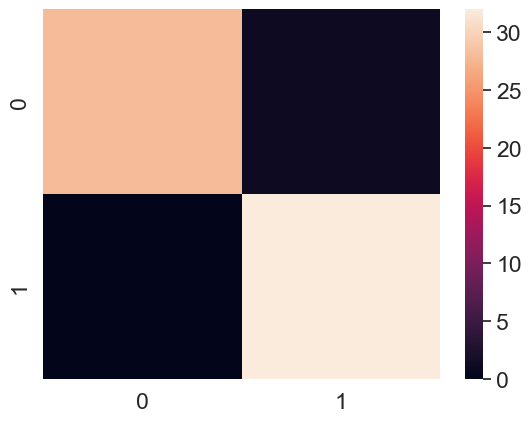

In [116]:
# Make our confusion materix more visual with Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confuion matrix
conf_mat = confusion_matrix(y5_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [118]:
clf

RandomForestClassifier(n_estimators=90)

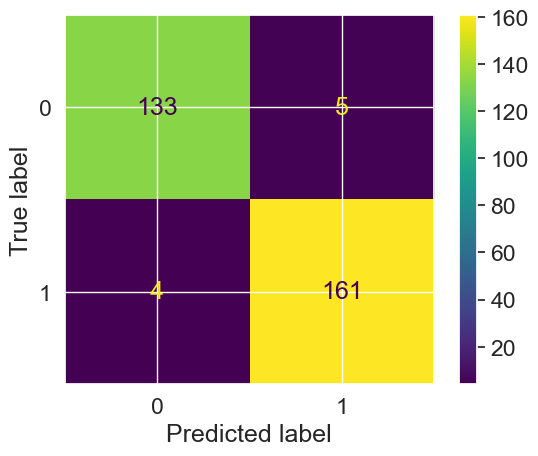

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model5, X=x5, y=y5);

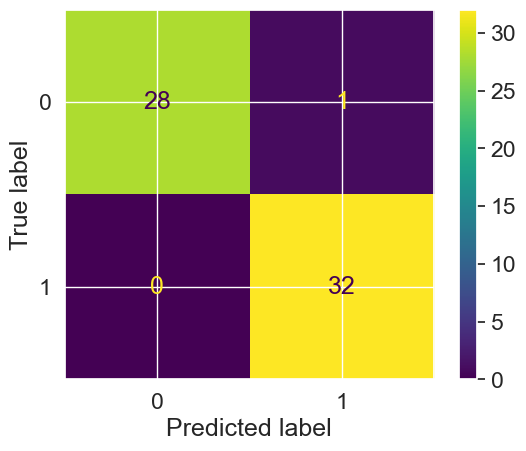

In [126]:
ConfusionMatrixDisplay.from_predictions(y_true=y5_test, y_pred=y_preds);

**Classification report**

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y5_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        32

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



##### To summarize calssification mertrics:
   * **Accuracy** is a good measure to start with if all classses are balanced (e.g same amount of samples which are lablelled with 0 or 1).
   * **Precision** and **recall** become more important when classes are imbalanced.
   * If false positive predictions are worse than false negatives, aim higher precision.
   * if flase negative predictions are worse than false postives, aim for higher recall.
   * **F1-score** is a combination of precision and recall.
    

### 4.2.2 Regression model evaluate metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [129]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [131]:
model.score(X_test,y_test)

0.8066196804802649

In [132]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [133]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [134]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

**Mean absolute error (MAE)**

MEA is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [136]:
# MEA
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [138]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [139]:
# MEA using formulas and differences
np.abs(df["differences"]).mean()

0.32657218427810186

**Mean squared error (MSE)**

MSE is the mean of the squeare of the errors between actual and predicted values.

In [140]:
# Mean squared errors
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [141]:
df["squred_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squred_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


### 4.2.3 Finally using the `scoring` parameter

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease["target"]

clf = RandomForestClassifier()


In [143]:
np.random.seed(42)
# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [144]:
# Cross-validated accuracy
print(f"The Cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}")

The Cross-validated accuracy is: 82.48


In [145]:
np.random.seed(42)
# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") # if 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [146]:
# Cross-validated accuracy
print(f"The Cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}")

The Cross-validated accuracy is: 82.48


In [147]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision") # if 
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [148]:
# Cross-validated precision
print(f"The Cross-validated precision is: {np.mean(cv_precision)}")

The Cross-validated precision is: 0.8329547346025924


In [149]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall") # if 
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [150]:
# Cross-validated Recall
print(f"The Cross-validated recall is: {np.mean(cv_recall)}")

The Cross-validated recall is: 0.8545454545454545


## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learnign models/estimators is to using the `sklearn.metrics` module -

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
x = heartDisease.drop("target", axis=1)
y = heartDisease["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Create model
clf = RandomForestClassifier()

# fit model
clf.fit(x_train,y_train)

# Make predictions
y_preds = clf.predict(x_test)

# Evalute model using evaluation function
print("Classifier metrics on the test set")
print(f"Accurracy:{accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"F1:{f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Create model
model = RandomForestRegressor()

# fit model
model.fit(x_train,y_train)

# Make predictions
y_preds = model.predict(x_test)

# Evalute model using evaluation function
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MEA: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MEA: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we imrove our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters

* Parameters = model find these pattern in data.
* Hyperparameters = settings on model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustivly with GridSearchCV

### 5.1 Tuning hyperparametors

Let's make 3 sets, validation and test

We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [159]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [163]:
def evaluate_preds(y_true, y_preds):
    """"
    Performs evaluations comparsion on y_true labels vs y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [164]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heartDisease_shuffle = heartDisease.sample(frac=1)

# Split in x & y
x = heartDisease_shuffle.drop("target", axis=1)
y = heartDisease_shuffle["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heartDisease_shuffle)) # 70% of data
valid_split = round(train_split + 0.15 * len(heartDisease_shuffle)) #15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# len(x_train),len(x_valid),len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_preds = clf.predict(x_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [245]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200, 500, 1000, 1200],
       "max_depth": [None,5,10,20,30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into x and y
x = heartDisease_shuffle.drop("target", axis=1)
y = heartDisease_shuffle["target"]

# split into train test sets
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [246]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [247]:
# Make predictions with the best hyperparameters
rs_y__preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y__preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [248]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [249]:
grid_2 = {'n_estimators': [ 100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [ 6],
 'min_samples_leaf': [1, 2]}

In [261]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x and y
x = heartDisease_shuffle.drop("target", axis=1)
y = heartDisease_shuffle["target"]

# split into train test sets
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
# clf_2 = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
# gs_clf = GridSearchCV(estimator=clf_2,
#                            param_grid=grid_2,
#                            cv=5,
#                            verbose=2)
# Fit the GridSearchCV version of clf
# gs_clf.fit(x_train, y_train);

In [251]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [252]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


Let's compare our different models metrics

In [264]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf": clf, 
                                "random search": rs_metrics, 
                                "grid search": gs_metrics})

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [258]:
compare_metrics.plot.bar()

<AxesSubplot:>

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [259]:
import pickle

# Save
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [260]:
# Load a saved model
load_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [263]:
# Make some predictions
pickle_y_preds = load_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [265]:
from joblib import dump, load

# Save model
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [266]:
# Import a saved joblib 
load_job_model = load(filename="gs_random_forest_model_1.joblib")

In [267]:
load_job_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [268]:
joblib_y_preds = load_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Puting all togather 

In [269]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [270]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [271]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2.Convert data to numbers
3. Build a model on the data

In [274]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop with missing lables
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define diffrent features and transformer pipline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocesing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_feature)
])

# Creating a preprocesing and modelling pipline
model = Pipeline(steps=([("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())]))

# Split data
x = data.drop("Price", axis=1)
y = data["Price"]

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipline`

In [276]:
# Use GridSearchCV with our regression Piple
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [277]:
gs_model.score(x_test, y_test)

0.3339554263158365